## Maximum Likelihood Lab

In this lab we will look at the DMV waiting time example from the class. Let's look at the following situation:

You want to find out how long your mom will have to wait at the DMV. In order to determine the waiting time you stayed at the DMV for a while and measured the waiting time for the customers. You were playing on your phone and so you missed to to measure the exact time. Thus you started to collect the waiting times in the form (5, 0.3), which in this example means that the waiting time was somewhere between 5-0.3 and 5+0.3 minutes. 

Now that you have your data you want to build a model. You now assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

Please take a moment and think about the 3 major assumptions:
1. The waiting times are independet.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 

**Exercise 1:**

Create a lambda expression for the Gamma distribution. You will need the gamma function $\Gamma$ which is available in the scipy.special package. Plot the Gamma distribution for 4 different combinations of $\beta$ and $\alpha$ onto the same graph. Describe how the hyperparameters $\beta$ and $\alpha$ change the shape of the distribution.

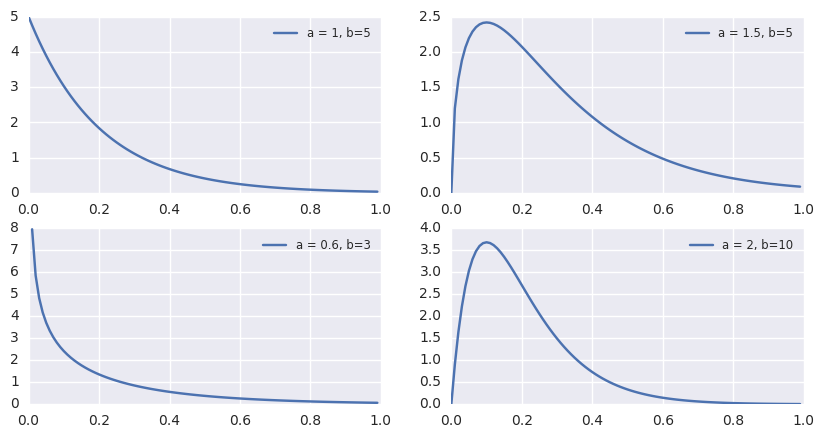

In [33]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy.integrate import quad
%matplotlib inline


Gamma = lambda alpha,beta: lambda x: (beta**alpha)*(x**(alpha-1))*np.exp(-x*beta)/gamma(alpha)                                                                               
alpha = [1,1.5,0.6,2]
beta = [5,5,3,10]
y = np.arange(0,1,0.01)                                         
ziped = zip(alpha,beta)
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
ziped2 = zip(ax,ziped)
for e in ziped2:
    e[0].plot(y,Gamma(*e[1])(y), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small') 


    
# Plots probability distribution for various alphas's and betas.    
# The higher the alpha and beta's tend to be, the fatter the distribution tends to be. There is 
# more variance around distribution for higher values of alpha and beta.




                                            

**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an intervall of time that you measured. You can now use the below data points to calculate the probability of the measured intervalls as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and craete a 3D plot. You will need to use numpy.vectorize to vectorize the lambda expression. Numpy converts the lambda expression so that it can take numpy arrays as arguments. Look into last weeks notes to find out how to plot a 3D plot.

In [13]:
waiting_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]

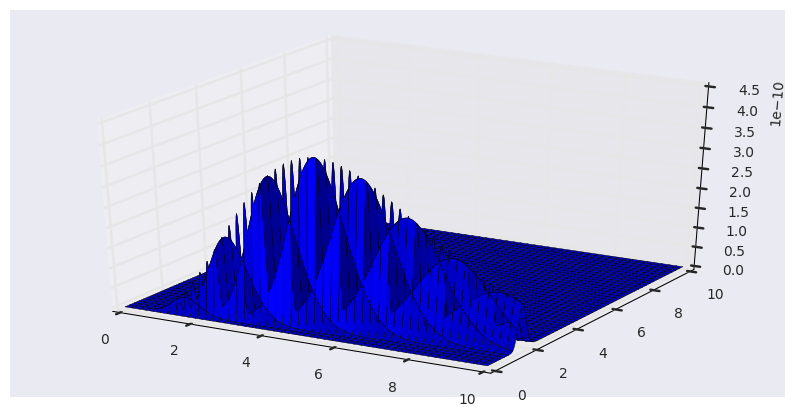

In [34]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy.integrate import quad
%matplotlib inline


Gamma_junior = (lambda x,y: quad(lambda z: Gamma(x,y)(z), 3.8, 4.2)[0]
                              * quad(lambda z: Gamma(x,y)(z), 3.5, 4.5)[0] 
                              * quad(lambda z: Gamma(x,y)(z), 4.1, 5.9)[0]
                              * quad(lambda z: Gamma(x,y)(z), 5.8, 6.2)[0]
                              * quad(lambda z: Gamma(x,y)(z), 3.8, 4.2)[0]
                              * quad(lambda z: Gamma(x,y)(z), 5.8, 6.2)[0]
                              * quad(lambda z: Gamma(x,y)(z), 4.4, 5.6)[0]
                              * quad(lambda z: Gamma(x,y)(z), 14.4, 15.6)[0])




x = np.linspace(0.01,10, 500)
y = np.linspace(0.01,10, 500)
x, y = np.meshgrid(x,y)
distvec = np.vectorize(Gamma_junior)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(x, y, distvec(x, y))














### Plots the probability density for all 8 events as a conditional probability (probabilityt 
### all waiting times occur)







**Exercise 3:**

Each of the points $(\beta, \alpha)$ represents a model that we could pick and the plot shows us how likely the measured waiting times are if we would have fixed $(\beta, \alpha)$ at the respective values. We now have to make a decision which pair $(\beta, \alpha)$ we want to pick. One way to approach this decision problem is to pick the $(\beta, \alpha)$ pair which produces the highest probability for the measured event. This approach is called **Maximum Likelihood**. 

Use the minimize function in the scipy.optimize package to find the maximum likelihood. You will have to change the function so that the maximum becomes the minimum. Additionally, minimize only takes functions of one variable. You will have to change your function so that it takes a list as an argument and not two numbers. minimize looks for a minimum around an initial point x0. You will have to provide such a point. Use method = 'Nelder-Mead'. 

See below for an example of how to use minimize.

In [35]:


from scipy.optimize import minimize 
alpha = [1,1.5,0.6,2]
beta = [5,5,3,10]




function = lambda h: -Gamma_junior(h[0],h[1])

x0 = [6,2]
funxMin = minimize(function, x0, method = 'Nelder-Mead')
funxMin.x

alpha_max = funxMin.x[0]
beta_max = funxMin.x[1]

print funxMin.x





### Finds optimal alpha and beta value according to the maximum likelihood method.







[ 4.95841487  0.81044585]


**Exercise 4:**

Now that we have our maximum likelihood solution we can take a step back and think about what we just did. 

* Take a look at the plot and remind yourself that minimize looks for a solution around an initial point x0. What's the problem with that?
* We assumed that the outcome that we measured is the outcome with the hightest probability. Take a look at the actual probability of getting what we measured under the assumption of the model. How likely was it? 
* Take a moment and check out what outliers are. How do those data points effect the solution in light of the above point and why?
* Can you think of a way to make a better decision?

There are are local minima close to the initial point x0 that are different from the global minima. Therefore, you might think that you are spotting a minimia when really its one of many minima and not the actual global minimum.

The probability of the highest outcome we measured is about 15.9%.

The last data point (15,0.6) is most definitely the outlier in this case because it is the one point that is significantly furthest away from most of the other points. It slightly increases the right tail of the distribution and increases the mean waiting_time because that data point is significantly higher than the other waiting_times. 

Ideally, it would be great to have a much more data points in order to make a decision. A small number of data points causes more variance (and standard deviation) and will have outliers impact the results more than a dataset with few points. Monte Carlo simulation could potentially improve the solution.



# **Exercise 5:**

Plot the distribution of the maximum likelihood solution together with a normed histogram of the waiting times. What can you observe and how does this relate to Exercise 4?

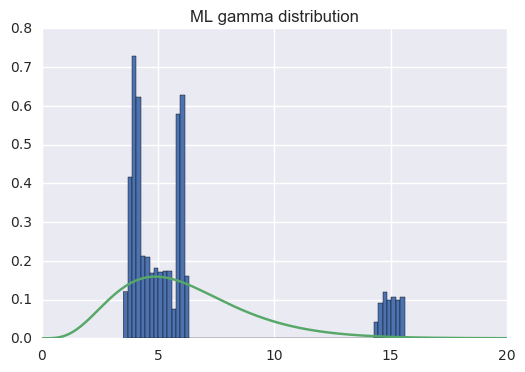

In [37]:


alpha = 8.86083984
beta = -42.23242188

Gamma = lambda alpha,beta: lambda x: (beta**alpha)*(x**(alpha-1))*np.exp(-x*beta)/gamma(alpha)

import numpy as np
import matplotlib.pyplot as plt

# create a sample of waiting times to resemble the uniform distributions from the data: 
# plus minuses the waiting times in the 2nd tuple.


observed_counts = np.empty(1000 * len(waiting_time))

for i, wt in enumerate(waiting_time):
    
    observed_counts[1000 * i:1000 * (i + 1)] = np.random.uniform(low=wt[0] - wt[1],
                                                                 high=wt[0] + wt[1],
                                                                 size=1000)


ts = np.linspace(0,20,200)


# plot a histogram of the "observations
plt.hist(observed_counts, bins='auto', normed=True)  # plt.hist passes it's arguments to np.histogram

# plot the distribution over a similar time range for the gamma function with the maximum likelihood parameters
plt.plot(ts, Gamma(alpha_max, beta_max)(ts))
plt.title("ML gamma distribution")
plt.show()

## You can see multiple outliers at the very end of the tail of the distribution. If you could get
## rid of those outliers it would reduce the variance. If you do a similar experiment at the 
## DMV but with much larger data points the outliers would probably have a much reduced effect
## decreasing the variance and standard deviation.



In [40]:
q = Gamma(alpha_max, beta_max)(4)



**Exercise 6:**

Calculate the Mean and the Variance of the maximum likelihood distribution using integration. Remember: The Mean of the distribution $E[W]$ is the expected waiting time and the square root of the variance $\sqrt{Var[W]}$ is the expected range of waiting times.

In [41]:
mean = quad(lambda z: Gamma(alpha_max, beta_max)(z) * z, 0, np.inf)[0]


var = quad(lambda z: Gamma(alpha_max, beta_max)(z) * z**2, 0, np.inf)[0] - mean**2


stdev = np.sqrt(var)
stdev

print mean, var

6.11813219682 7.5490943354


**Exercise 7:**

Use the minimize function to calculate the waiting time with the hightest probability and its respective probability. Compare your result to the result of Exercise 6. Does this make you think about a better decision methedology for $(\beta, \alpha)$?

In [42]:
function = lambda h: -Gamma(alpha_max,beta_max)(h)

x0 = 5
funxMin = minimize(function, x0, method = 'Nelder-Mead')
t_hprob = funxMin.x

p_t = Gamma(alpha_max,beta_max)(t_hprob)

print t_hprob, p_t

[ 4.88421631] [ 0.15912912]


The probabilities in question 6 and 7 show somewhat different results. I think more data points are needed to do get a more robust and accurate model, 8 sample points is simply not
enough to make conclusions with confidence. If you use an alternative methodology to make
inferences such as the Z-test score statistic, it tends to want at least 30 data points 
because otherwise there are too much possibilites for outliers to distort the results.
